In [34]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import sys
sys.path.append("../../../")
import numpy
import pickle
# Importamos nuestras funciones
# -----------------------------------------------------------------------
import src.soporte_modelos_regresion as sr
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_pickle("../../../datos/02_regresiones/cluster_0/05_datos_outliers_gestionados.pkl")

In [36]:
# instanciamos la clase de regresión logistica
decision_tree = sr.AnalisisModelos(dataframe = df, variable_dependiente = "Profit",train_size=0.8)

# llamamos a la función para ajustar el modelo
decision_tree.ajustar_modelo("tree_regressor",scoring="neg_mean_squared_error",ruta_guardar_modelo="../../../datos/03_encoders",nombre_modelo_guardar="decision_tree_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'max_depth': [3, 5, 7, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
DecisionTreeRegressor(max_depth=10, random_state=42)
-------------------------------------------------


In [37]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_tree = decision_tree.calcular_metricas(modelo_nombre =  "tree_regressor").T
df_tree["modelo"] = "decision_tree"
df_tree

,r2_score,MAE,MSE,RMSE,modelo
train,0.766320,32.617545,5731.292876,75.705303,decision_tree
test,0.780446,31.342378,5309.152174,72.863929,decision_tree


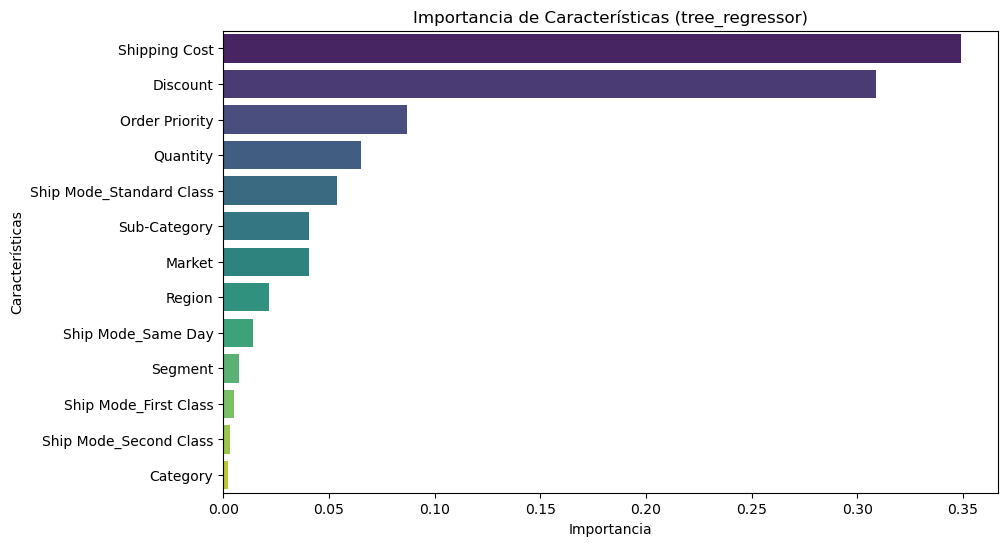

In [38]:
# Mostramos la importancia de los predictores en el modelo regresión logística
decision_tree.importancia_predictores(modelo_nombre ='tree_regressor')

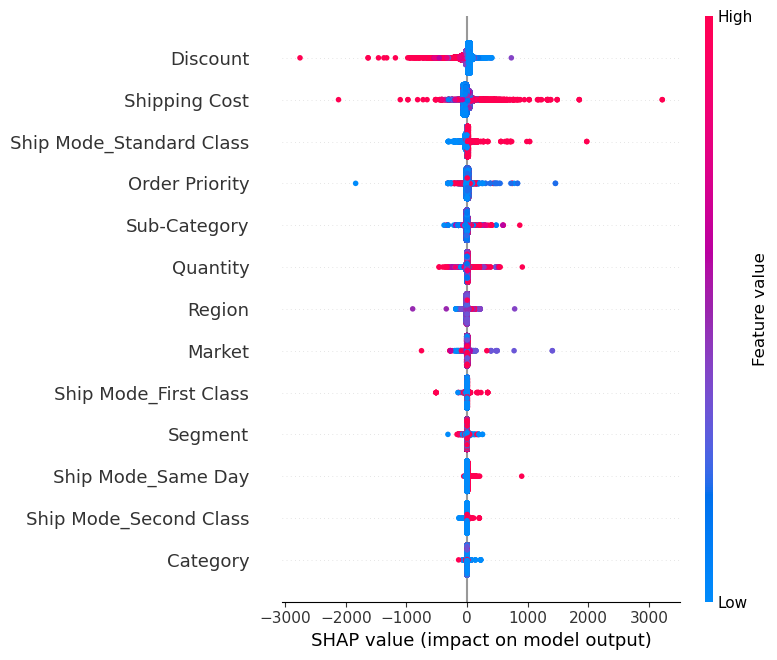

In [39]:
decision_tree.plot_shap_summary(modelo_nombre ='tree_regressor')

# XGBoost

In [40]:
# instanciamos la clase de regresión logistica
xgboost = sr.AnalisisModelos(dataframe = df, variable_dependiente = "Profit",train_size=0.8)

# llamamos a la función para ajustar el modelo
xgboost.ajustar_modelo("xgboost_regressor",scoring="neg_mean_squared_error",ruta_guardar_modelo="../../../datos/03_encoders",nombre_modelo_guardar="random_forest_model.pkl")

-------------------------------------------------
Parámetros de Grid Search:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_child_weight': [1, 3, 5],
 'subsample': [0.8, 1.0],
 'colsample_bytree': [0.8, 1.0]}

-------------------------------------------------
-------------------------------------------------
El mejor modelo es:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
-------------------------------------------------


In [41]:
# llamamos al metodo para obtener los resultaods de las predicciones
df_xgb = xgboost.calcular_metricas(modelo_nombre =  "xgboost_regressor").T
df_xgb["modelo"] = "decision_tree"
df_xgb

,r2_score,MAE,MSE,RMSE,modelo
train,0.802146,30.479082,4852.597985,69.660591,decision_tree
test,0.844528,29.109098,3759.549971,61.315169,decision_tree


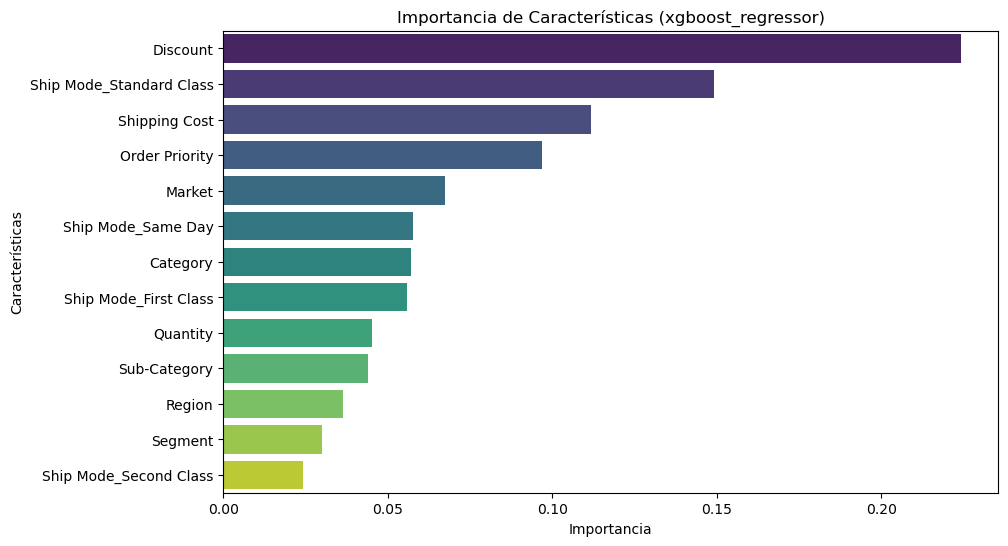

In [42]:
# Mostramos la importancia de los predictores en el modelo regresión logística
xgboost.importancia_predictores(modelo_nombre ='xgboost_regressor')

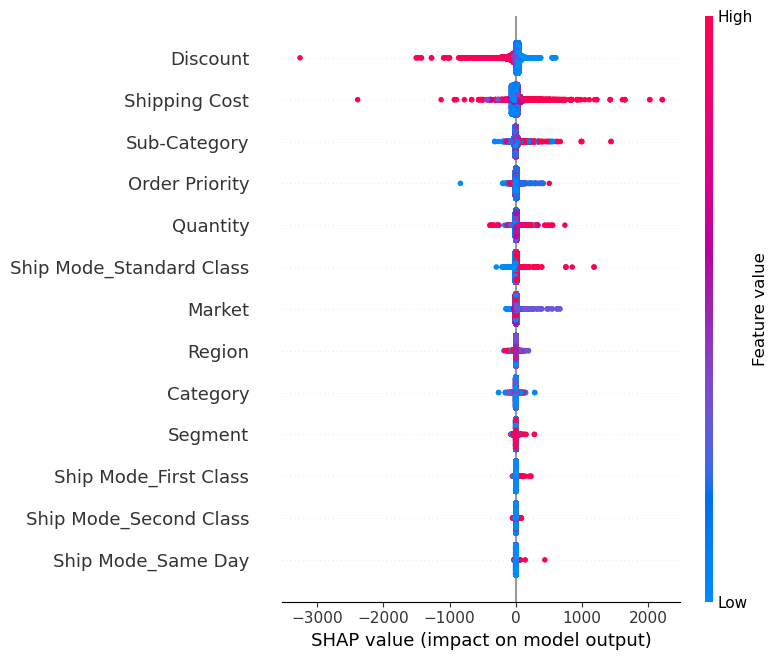

In [43]:
xgboost.plot_shap_summary(modelo_nombre ='xgboost_regressor')